<a href="https://colab.research.google.com/github/khanhsvan/someCollab/blob/main/new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression
from itertools import product
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error, mean_absolute_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Đọc dữ liệu từ file CSV
games_df = pd.read_csv('/content/drive/MyDrive/games.csv')
recommendations_df = pd.read_csv('/content/drive/MyDrive/recommendations.csv', error_bad_lines=False)
users_df = pd.read_csv('/content/drive/MyDrive/users.csv', error_bad_lines=False)


<ipython-input-3-4645d2dec3d3>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  recommendations_df = pd.read_csv('/content/drive/MyDrive/recommendations.csv', error_bad_lines=False)
<ipython-input-3-4645d2dec3d3>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  users_df = pd.read_csv('/content/drive/MyDrive/users.csv', error_bad_lines=False)


In [4]:
recommendations_df.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,49618,0
1,304390,4,0,2017-02-17,False,11.5,2482,1
2,1085660,2,0,2019-11-17,True,336.5,243365,2
3,703080,0,0,2022-09-23,True,27.4,248653,3
4,526870,0,0,2021-01-10,True,7.9,22898,4


In [5]:
games_df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [6]:
users_df.head()

,user_id,products,reviews
0,7089523,359,0
1,13509147,156,1
2,8443010,329,4
3,4631165,176,3
4,4967668,98,2


In [7]:
# Loại bỏ dữ liệu thiếu
recommendations_df.dropna(inplace=True)
games_df.dropna(inplace=True)
users_df.dropna(inplace=True)

# Thay thế giá trị 0 thành NaN trong các cột 'funny' và 'helpful'
recommendations_df['funny'] = recommendations_df['funny'].apply(lambda x: pd.NA if x == 0 else x)
recommendations_df['helpful'] = recommendations_df['helpful'].apply(lambda x: pd.NA if x == 0 else x)
games_df['discount'] = games_df['discount'].apply(lambda x: pd.NA if x == 0.0 else x)


In [8]:
print("sum of Nan values: ",recommendations_df.isna().sum())
print("sum of Nan values: ",games_df.isna().sum())
print("sum of Nan values: ",users_df.isna().sum())


sum of Nan values:  app_id                   0
helpful           30211339
funny             35913201
date                     0
is_recommended           0
hours                    0
user_id                  0
review_id                0
dtype: int64
sum of Nan values:  app_id                0
title                 0
date_release          0
win                   0
mac                   0
linux                 0
rating                0
positive_ratio        0
user_reviews          0
price_final           0
price_original        0
discount          45827
steam_deck            0
dtype: int64
sum of Nan values:  user_id     0
products    0
reviews     0
dtype: int64


In [9]:
recommendations_df = recommendations_df.dropna()
games_df = games_df.dropna()
ussers_df = users_df.dropna()

In [10]:
print("sum of Nan values: ",games_df.isna().sum())
print("sum of Nan values: ",recommendations_df.isna().sum())
print("sum of Nan values: ",users_df.isna().sum())


sum of Nan values:  app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64
sum of Nan values:  app_id            0
helpful           0
funny             0
date              0
is_recommended    0
hours             0
user_id           0
review_id         0
dtype: int64
sum of Nan values:  user_id     0
products    0
reviews     0
dtype: int64


In [11]:

users_df.head()

,user_id,products,reviews
0,7089523,359,0
1,13509147,156,1
2,8443010,329,4
3,4631165,176,3
4,4967668,98,2


In [12]:
recommendations_df.head()
games_df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
17,245950,Borderlands 2: Headhunter 4: Wedding Day Massacre,2014-02-11,True,True,True,Very Positive,84,294,0.89,2.99,70.0,True
18,250460,Bridge Constructor,2013-10-16,True,True,True,Mostly Positive,77,716,2.39,19.99,88.0,True
44,410970,Master of Orion 1,2016-08-25,True,True,True,Very Positive,90,279,0.89,5.99,85.0,True
54,342310,RIOT: Civil Unrest,2019-02-12,True,True,True,Mixed,68,1280,5.09,16.99,70.0,True
109,727980,Injustice™ 2 - Black Manta,2017-11-14,True,False,False,Positive,82,23,2.39,5.99,60.0,True


In [13]:
# Merge recommendations_df và games_df trên cột 'app_id'
merged_df = pd.merge(recommendations_df[['app_id', 'helpful', 'funny','is_recommended', 'hours', 'user_id', 'review_id']], games_df[['app_id', 'user_reviews', 'price_final', 'positive_ratio', 'discount', 'date_release','steam_deck','linux','win','mac']], on='app_id', how='left')
merged_df['is_recommended'] = merged_df['is_recommended'].apply(lambda x: 1 if x else 0)
merged_df['win'] = merged_df['win'].apply(lambda x: 1 if x else 0)
merged_df['mac'] = merged_df['mac'].apply(lambda x: 1 if x else 0)
merged_df['linux'] = merged_df['linux'].apply(lambda x: 1 if x else 0)
merged_df['steam_deck'] = merged_df['steam_deck'].apply(lambda x: 1 if x else 0)

merged_df['helpful'] = merged_df['helpful'].astype('int64')
merged_df['funny'] = merged_df['funny'].astype('int64')
merged_df['date_release'] = pd.to_datetime(merged_df['date_release']) # Chuyển cột sang dạng datetime
merged_df['discount'] = merged_df['discount'].apply(lambda x: float(str(x).replace("%", "")) if x else x)

# merged_df = merged_df.head(1000000)
merged_df = merged_df.dropna()
merged_df.head(100)


,app_id,helpful,funny,is_recommended,hours,user_id,review_id,user_reviews,price_final,positive_ratio,discount,date_release,steam_deck,linux,win,mac
1439,1850570,12,2,1,72.5,5156168,44337,13621.0,19.99,93.0,50.0,2022-03-30,1,0,1,0
3380,1850570,157,11,1,22.2,10620392,102706,13621.0,19.99,93.0,50.0,2022-03-30,1,0,1,0
4607,1850570,4,3,0,32.1,4688586,139183,13621.0,19.99,93.0,50.0,2022-03-30,1,0,1,0
6502,1850570,22,8,1,28.0,9538457,194090,13621.0,19.99,93.0,50.0,2022-03-30,1,0,1,0
6877,1850570,30,27,1,14.2,11213810,203832,13621.0,19.99,93.0,50.0,2022-03-30,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79917,1850570,3,3,0,14.1,4530670,2366717,13621.0,19.99,93.0,50.0,2022-03-30,1,0,1,0
82474,1850570,76,5,1,49.9,10398094,2441297,13621.0,19.99,93.0,50.0,2022-03-30,1,0,1,0
83743,1850570,2,2,0,12.2,10949226,2479774,13621.0,19.99,93.0,50.0,2022-03-30,1,0,1,0
86609,1850570,46,3,1,84.0,11627755,2564492,13621.0,19.99,93.0,50.0,2022-03-30,1,0,1,0


In [14]:
merged_df = pd.merge(merged_df, users_df, on='user_id', how='inner')
merged_df.head()

,app_id,helpful,funny,is_recommended,hours,user_id,review_id,user_reviews,price_final,positive_ratio,discount,date_release,steam_deck,linux,win,mac,products,reviews
0,1850570,12,2,1,72.5,5156168,44337,13621.0,19.99,93.0,50.0,2022-03-30,1,0,1,0,1433,340
1,232430,28,3,0,3.2,5156168,11266936,12359.0,8.99,76.0,40.0,2013-08-15,1,1,1,1,1433,340
2,7940,31,4,1,7.0,5156168,14555927,16617.0,9.99,93.0,50.0,2007-11-12,1,0,1,1,1433,340
3,1139900,44,4,1,10.6,5156168,18313029,36852.0,8.99,92.0,70.0,2020-10-27,1,0,1,0,1433,340
4,534550,18,3,0,17.9,5156168,18757915,2137.0,4.99,91.0,75.0,2018-08-21,1,0,1,0,1433,340


In [15]:
print( merged_df.dtypes)
print(merged_df.shape)

app_id                     int64
helpful                    int64
funny                      int64
is_recommended             int64
hours                    float64
user_id                    int64
review_id                  int64
user_reviews             float64
price_final              float64
positive_ratio           float64
discount                 float64
date_release      datetime64[ns]
steam_deck                 int64
linux                      int64
win                        int64
mac                        int64
products                   int64
reviews                    int64
dtype: object
(98829, 18)


In [69]:
correlation_matrix = recommendations_df.corr()
print(correlation_matrix)

<ipython-input-69-3f8802dae871>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = recommendations_df.corr()


                  app_id  is_recommended     hours   user_id  review_id
app_id          1.000000       -0.056227 -0.165775 -0.009950   0.059158
is_recommended -0.056227        1.000000  0.065126 -0.031140   0.074981
hours          -0.165775        0.065126  1.000000  0.001715  -0.188156
user_id        -0.009950       -0.031140  0.001715  1.000000  -0.003304
review_id       0.059158        0.074981 -0.188156 -0.003304   1.000000


In [17]:
merged_df.head()

,app_id,helpful,funny,is_recommended,hours,user_id,review_id,user_reviews,price_final,positive_ratio,discount,date_release,steam_deck,linux,win,mac,products,reviews
0,1850570,12,2,1,72.5,5156168,44337,13621.0,19.99,93.0,50.0,2022-03-30,1,0,1,0,1433,340
1,232430,28,3,0,3.2,5156168,11266936,12359.0,8.99,76.0,40.0,2013-08-15,1,1,1,1,1433,340
2,7940,31,4,1,7.0,5156168,14555927,16617.0,9.99,93.0,50.0,2007-11-12,1,0,1,1,1433,340
3,1139900,44,4,1,10.6,5156168,18313029,36852.0,8.99,92.0,70.0,2020-10-27,1,0,1,0,1433,340
4,534550,18,3,0,17.9,5156168,18757915,2137.0,4.99,91.0,75.0,2018-08-21,1,0,1,0,1433,340


In [18]:
merged_df['year_release'] = merged_df['date_release'].dt.year
merged_df['month_release'] = merged_df['date_release'].dt.month
merged_df['year_release'] = merged_df['year_release'].astype('int64')
merged_df['month_release'] = merged_df['month_release'].astype('int64')
merged_df['platform'] = merged_df['win'] + merged_df['mac'] + merged_df['linux'] + merged_df['steam_deck']


In [20]:


# Tiếp tục với việc chọn các cột cần thiết
selected_columns = ["user_reviews", "positive_ratio", "discount", "price_final", "hours", "year_release", "platform"]
X = merged_df[selected_columns]
y = merged_df['positive_ratio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42) #đã ổn định(0.45)


In [21]:
selected_columns_dtypes = merged_df[selected_columns].dtypes
print(selected_columns_dtypes)
merged_df.head(10000)
print(merged_df.shape)

user_reviews      float64
positive_ratio    float64
discount          float64
price_final       float64
hours             float64
year_release        int64
platform            int64
dtype: object
(98829, 21)


In [22]:
# Khởi tạo và huấn luyện mô hình
model = RandomForestRegressor(n_estimators=100, max_depth=4, min_samples_split=10, min_samples_leaf=100, random_state=42, max_features=0.5)
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=4, max_features=0.5, min_samples_leaf=100,
                      min_samples_split=10, random_state=42)

In [23]:
# Dự đoán trên tập kiểm tra
y_pred_rf = model.predict(X_test)


In [61]:
from sklearn.metrics import mean_squared_error, r2_score, recall_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans


In [59]:
r2 = r2_score(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)


print(f"Random Forest - R^2 Score: {r2:.4f}")
print(f"Random Forest - Mean Squared Error: {mse:.4f}")


Random Forest - R^2 Score: 0.9410
Random Forest - Mean Squared Error: 11.4622


In [86]:
# Chọn số lượng cụm mong muốn
num_clusters = 10
# Tạo ma trận chứa dữ liệu để sử dụng trong K-means Clustering
X = merged_df[selected_columns]
print(X.shape)
# Khởi tạo mô hình K-means với số lượng cụm cần gom
kmeans = KMeans(n_clusters=num_clusters)
# Huấn luyện mô hình
kmeans.fit(X)
# Dự đoán nhãn cụm cho mỗi điểm dữ liệu
clusters = kmeans.predict(X)

# Thêm cột 'cluster' vào DataFrame để lưu nhãn cụm tương ứng
merged_df['cluster'] = clusters

# Hiển thị kết quả
print(merged_df.head())

cluster_percentage = merged_df['cluster'].value_counts(normalize=True) * 100
print(cluster_percentage)


(98829, 7)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


    app_id  helpful  funny  is_recommended  hours  user_id  review_id  \
0  1850570       12      2               1   72.5  5156168      44337   
1   232430       28      3               0    3.2  5156168   11266936   
2     7940       31      4               1    7.0  5156168   14555927   
3  1139900       44      4               1   10.6  5156168   18313029   
4   534550       18      3               0   17.9  5156168   18757915   

   user_reviews  price_final  positive_ratio  ...  steam_deck linux  win  mac  \
0       13621.0        19.99            93.0  ...           1     0    1    0   
1       12359.0         8.99            76.0  ...           1     1    1    1   
2       16617.0         9.99            93.0  ...           1     0    1    1   
3       36852.0         8.99            92.0  ...           1     0    1    0   
4        2137.0         4.99            91.0  ...           1     0    1    0   

   products  reviews  year_release  month_release  platform  cluster  
0  

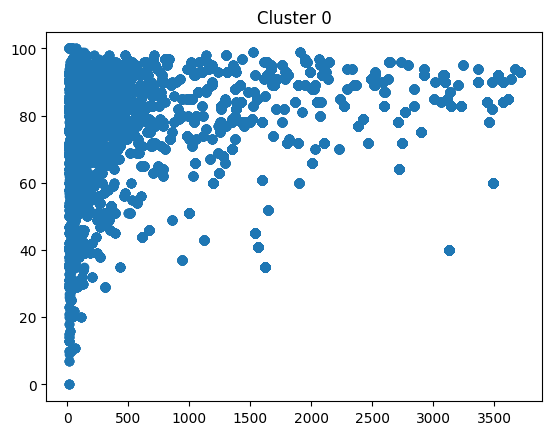

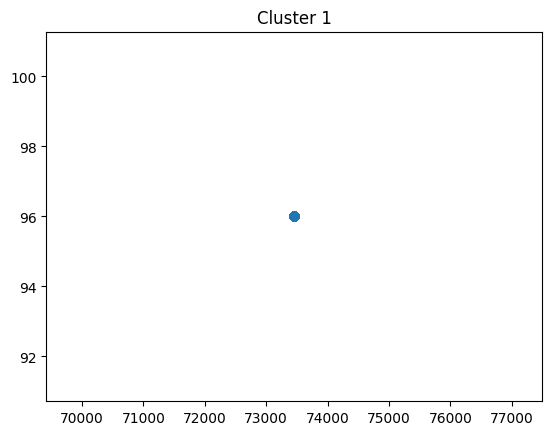

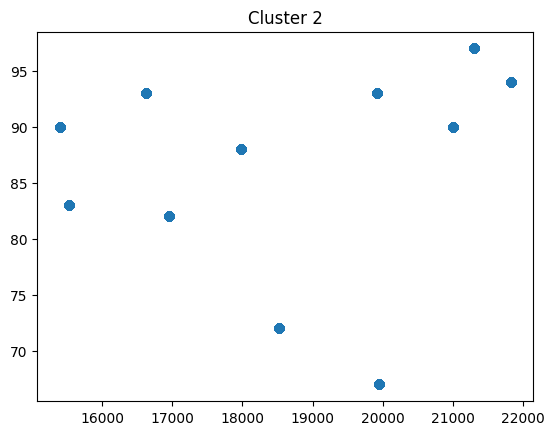

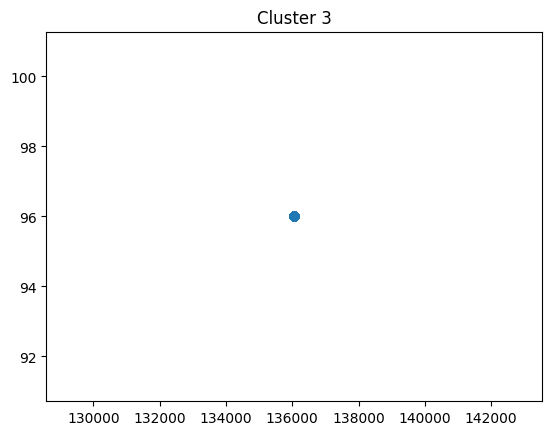

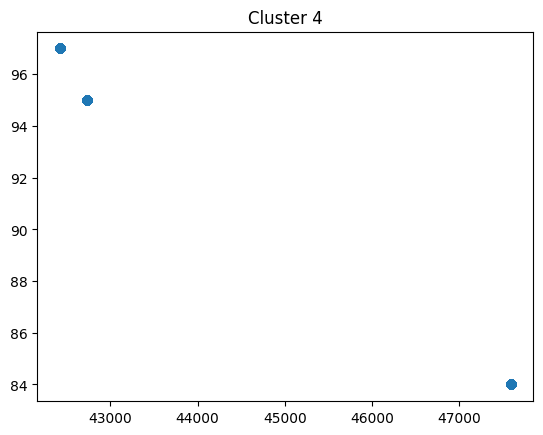

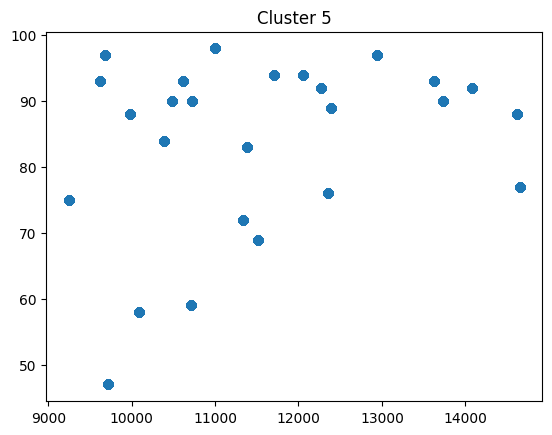

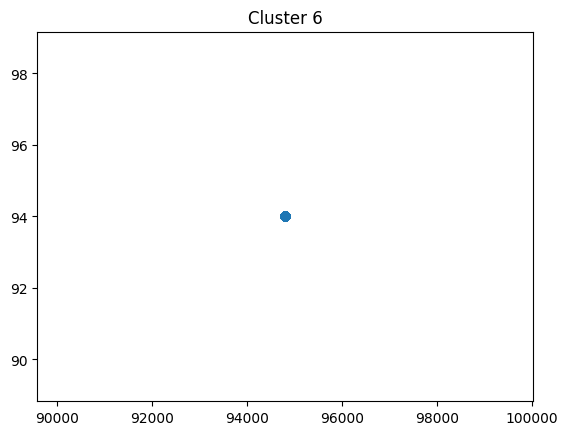

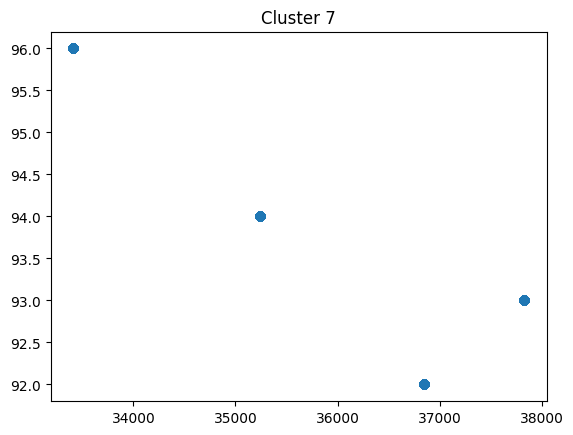

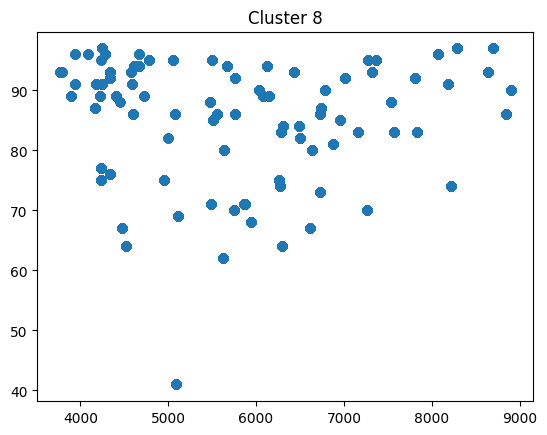

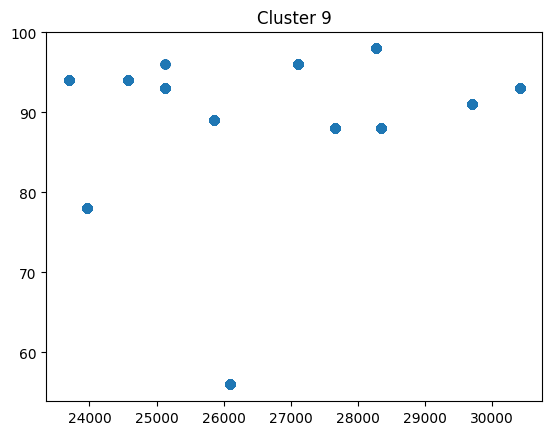

In [87]:
# Vẽ biểu đồ của từng cụm
for cluster_id in range(num_clusters):
    # Lấy các điểm dữ liệu trong cụm
    cluster_data = merged_df[merged_df['cluster'] == cluster_id]

    # Tạo biểu đồ của cụm
    fig, ax = plt.subplots()
    ax.scatter(cluster_data[selected_columns[0]], cluster_data[selected_columns[1]])
    ax.set_title(f"Cluster {cluster_id}")
    plt.show()

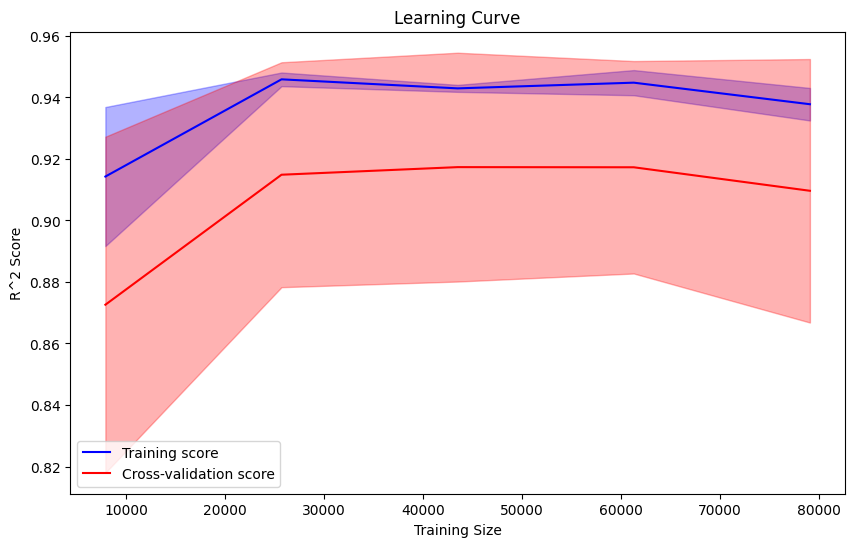

In [67]:

# Kiểm tra overfitting bằng việc vẽ Learning Curve
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='r2')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.3)
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.3)
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('R^2 Score')
plt.legend()
plt.show()

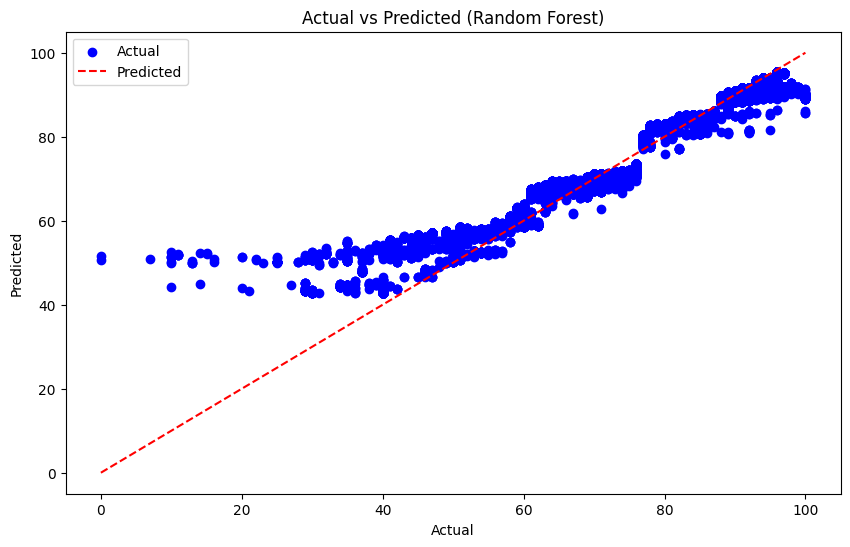

In [70]:
# Vẽ biểu đồ kết hợp đường cho dự đoán và thực tế từ mô hình Random Forest
plt.figure(figsize=(10, 6))

# Vẽ điểm thực tế
plt.scatter(y_test, y_pred_rf, color='blue', label='Actual')

# Vẽ đường dự đoán
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Predicted')

plt.title('Actual vs Predicted (Random Forest)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [78]:
ridge_model = Ridge(alpha=0.2)  # You can adjust the alpha parameter for different levels of regularization
ridge_model.fit(X_train, y_train)



Ridge(alpha=0.2)

In [79]:
y_pred_ridge = ridge_model.predict(X_test)


In [80]:
# Calculate mean squared error
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Ridge Regression - Mean Squared Error: {mse_ridge:.4f}")

Ridge Regression - Mean Squared Error: 0.0000
